# Central Tendendy with Spotify

1. [Mean and Mode](#mean--mode)
2. [Standard Deviation & Skewness](#standard-devidation-and-skewness)
3. [Correlation](#correlation)
4. [Probabilities](#probabilities)
5. [Discrete Distributions - PMF & CDF](#discrete-distributions)
6. [Continuous Distributions](#continuous-distributions)

In [2]:
import pandas as pd

# Load file
df = pd.read_csv('./data/spotify_top3000.csv')
print("\n✅ Data loaded successfully.")



✅ Data loaded successfully.


## Mean & Mode

In [3]:
# mean and median for all nummerical columns
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)

# Print the results
print("\nMean values for numerical columns:")
print(mean_values)
print("\nMedian values for numerical columns:")
print(median_values)

# Print the mean for 'Duration' column in minutes
print("\nDuration statistics:")
print(f"Mean Duration: {df['duration_ms'].mean()/60/1000:.2f} minutes")
print(f"Median Duration: {df['duration_ms'].median()/60/1000:.2f} minutes")


Mean values for numerical columns:
Unnamed: 0            1499.500000
duration_ms         216299.193333
explicit                 0.190000
danceability             0.630451
energy                   0.677987
key                      5.458333
loudness                -6.416081
mode                     0.587333
speechiness              0.078743
acousticness             0.200047
instrumentalness         0.030785
liveness                 0.169242
valence                  0.509418
tempo                  119.374078
time_signature           3.946000
dtype: float64

Median values for numerical columns:
Unnamed: 0            1499.500000
duration_ms         210131.500000
explicit                 0.000000
danceability             0.640000
energy                   0.706000
key                      6.000000
loudness                -5.744000
mode                     1.000000
speechiness              0.049100
acousticness             0.093200
instrumentalness         0.000005
liveness                 0.

**Mean & Median for Specific Features**

In [4]:
features = ['energy', 'acousticness', 'key']

means = df[features].mean()
medians = df[features].median()

print("Means:\n", means)
print("Medians:\n", medians)

Means:
 energy          0.677987
acousticness    0.200047
key             5.458333
dtype: float64
Medians:
 energy          0.7060
acousticness    0.0932
key             6.0000
dtype: float64


**Mode of the `key` feature** 

In [5]:
# Mode (most frequent value) of the key column
mode_key = df['key'].mode()[0]  # `.mode()` returns a Series
print("Most Common Key (mode):", mode_key)

Most Common Key (mode): 1


In [6]:
 # print the distribution of the 'key' feature
 print(df['key'].value_counts().sort_index())


key
0     295
1     343
2     230
3     106
4     252
5     256
6     236
7     256
8     257
9     271
10    215
11    283
Name: count, dtype: int64


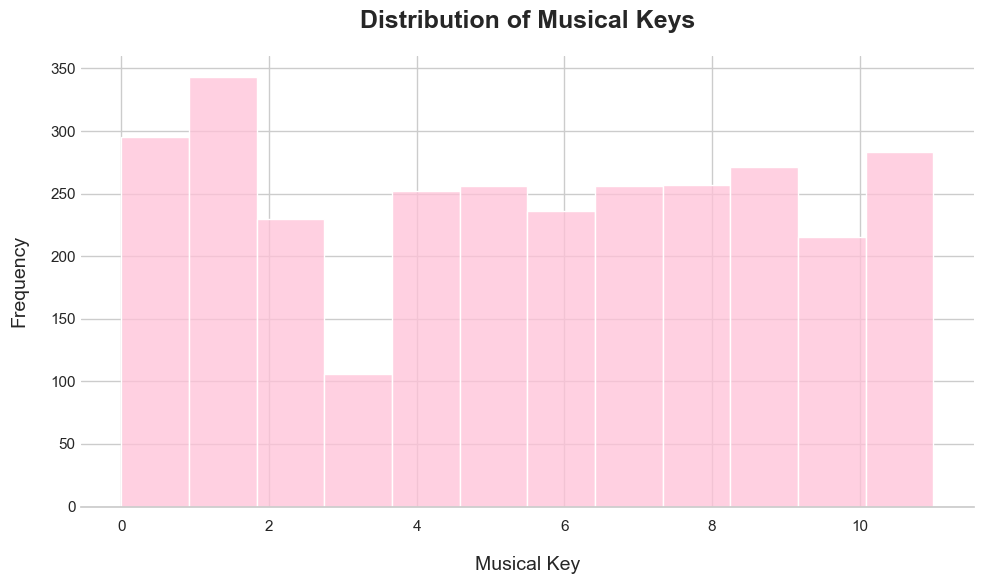

In [7]:
# plot the histogram of the 'key' feature

import matplotlib.pyplot as plt
import seaborn as sns

# set a clean style for the plots
sns.set(style="whitegrid")

# create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['key'], bins=12, kde=False, color='#ffc1d7')

# add titles and labels
plt.title('Distribution of Musical Keys', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Musical Key', fontsize=14, labelpad=16)
plt.ylabel('Frequency', fontsize=14, labelpad=16)

# edit the graph aesthetics
# Remove vertical ticks (on y-axis)
plt.tick_params(axis='y', which='both', length=0)

# Optional: remove vertical grid lines for cleaner look
sns.despine(left=True)


# show the plot
plt.tight_layout()
plt.show()

## Standard Devidation and Skewness

In [8]:
# standard deviation and skewness of the 'valence' feature
from scipy.stats import skew

std_valence = df['valence'].std()
skew_valence = skew(df['valence'].dropna())

print(f"\nStandard Deviation of 'valence': {std_valence:.4f}")
print(f"Skewness of 'valence': {skew_valence:.4f}")


Standard Deviation of 'valence': 0.2272
Skewness of 'valence': 0.0250


In [9]:
# standard deviation for energy, acousticness, and key
features = ['energy', 'acousticness', 'key']
std_values = df[features].std()
print("\nStandard Deviation for selected features:")
print(std_values)


Standard Deviation for selected features:
energy          0.182518
acousticness    0.239972
key             3.580671
dtype: float64


In [10]:
# skewness for energy, acousticness, and key
skew_values = df[features].apply(lambda x: skew(x.dropna()))
print("\nSkewness for selected features:")
print(skew_values)


Skewness for selected features:
energy         -0.629450
acousticness    1.399344
key            -0.034329
dtype: float64


### Interpreation of skewness


In [11]:
def interpret_skewness(value):
    if -0.5 <= value <= 0.5:
        return "Small"
    elif 0.5 < value <= 1 or -1 <= value < -0.5:
        return "Moderate"
    else:
        return "High"

def skew_direction(value):
    return "Positive" if value > 0 else "Negative" if value < 0 else "Symmetric"

# Combine everything into a DataFrame
summary_df = pd.DataFrame({
    'Standard Deviation': std_values.round(4),
    'Skewness': skew_values.round(4),
    'Skewness Level': skew_values.apply(interpret_skewness),
    'Skewness Direction': skew_values.apply(skew_direction)
})

# Display the result
print("\n=== Feature Summary ===\n")
print(summary_df.to_string())


=== Feature Summary ===

              Standard Deviation  Skewness Skewness Level Skewness Direction
energy                    0.1825   -0.6294       Moderate           Negative
acousticness              0.2400    1.3993           High           Positive
key                       3.5807   -0.0343          Small           Negative


## Correlation

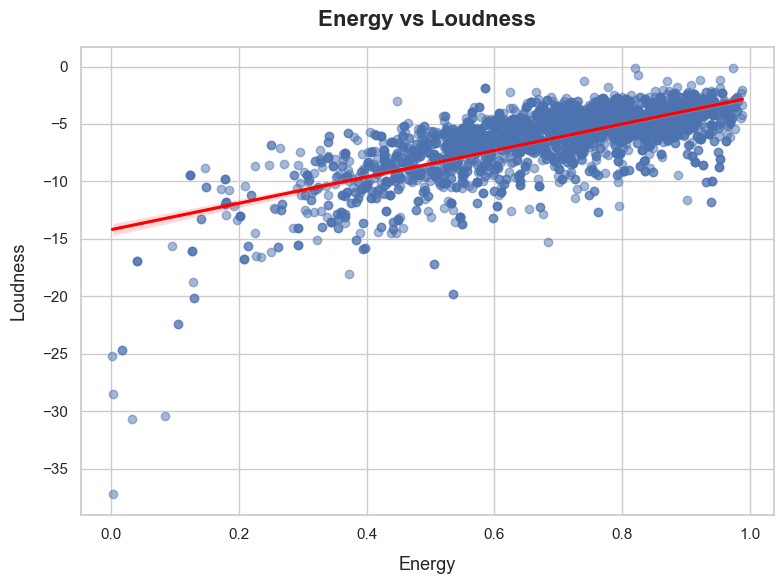

In [12]:
# scatter plot - energy vs loudness
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='energy', y='loudness', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Energy vs Loudness', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Energy', fontsize=13, labelpad=10)
plt.ylabel('Loudness', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

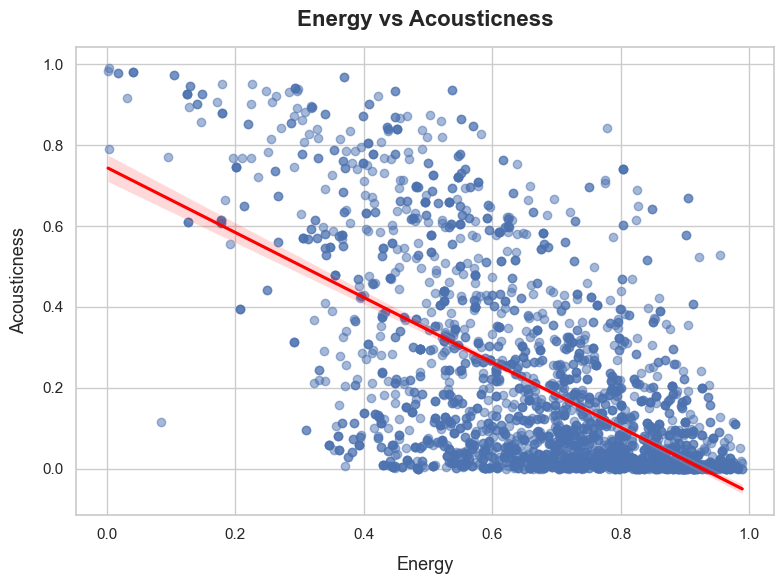

In [13]:
# scatter plot energy vs acousticness
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Energy vs Acousticness', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Energy', fontsize=13, labelpad=10)
plt.ylabel('Acousticness', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()


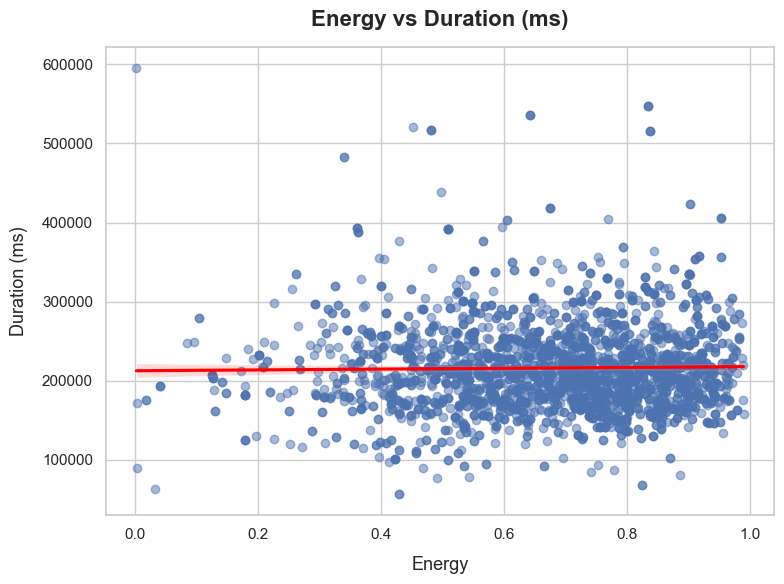

In [14]:
# scatter plot - energy vs duration_ms
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='energy', y='duration_ms', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Energy vs Duration (ms)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Energy', fontsize=13, labelpad=10)
plt.ylabel('Duration (ms)', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()


### Pearson Correlation Coefficients

In [15]:
corr_energy_acousticness = df['energy'].corr(df['acousticness'])
corr_energy_duration = df['energy'].corr(df['duration_ms'])

print(f"Correlation between Energy and Acousticness: {corr_energy_acousticness:.4f}")
print(f"Correlation between Energy and Duration: {corr_energy_duration:.4f}")


Correlation between Energy and Acousticness: -0.6109
Correlation between Energy and Duration: 0.0174


In [16]:
# interpret the correlation values
def interpret_corr(r):
    abs_r = abs(r)
    if abs_r < 0.3:
        return "Weak"
    elif abs_r < 0.7:
        return "Moderate"
    else:
        return "Strong"

print("Interpretation:")
print(f"Energy vs Acousticness: {interpret_corr(corr_energy_acousticness)}, {'Positive' if corr_energy_acousticness > 0 else 'Negative'}")
print(f"Energy vs Duration: {interpret_corr(corr_energy_duration)}, {'Positive' if corr_energy_duration > 0 else 'Negative'}")

Interpretation:
Energy vs Acousticness: Moderate, Negative
Energy vs Duration: Weak, Positive


## Probabilities

In [ ]:
# calculate the relative frequency of songs whose track_genre is "rock"
# P(track_genre='rock)
relative_freq_rock = df['track_genre'].value_counts(normalize=True).get('rock', 0) * 100
print(f"\nRelative Frequency of 'Rock' Genre: {relative_freq_rock:.2f}%")


Relative Frequency of 'Rock' Genre: 5.80%


In [ ]:
# calculate relative frequency of songs with a `duration_ms` less than 200000 ms
# P(duration_ms < 200000)
relative_freq_short_songs = (df['duration_ms'] < 200000).mean() * 100
print(f"Relative Frequency of Songs with Duration < 200000 ms: {relative_freq_short_songs:.2f}%")

Relative Frequency of Songs with Duration < 200000 ms: 40.10%


In [ ]:
# calculate the relative frequency of tracks with a duration_ms less than 200000 ms and whose track_genre is "rock"
# P(duration_ms < 200000 and track_genre='rock')
# P(A and B) = P(A) * P(B|A)
relative_freq_short_rock = ((df['duration_ms'] < 200000) & (df['track_genre'] == 'rock')).mean() * 100
print(f"Relative Frequency of 'Rock' Genre with Duration < 200000 ms: {relative_freq_short_rock:.2f}%")

Relative Frequency of 'Rock' Genre with Duration < 200000 ms: 1.73%


In [26]:
# another way to do it, using crosstab
# shows conditional probabilities of all track_genres with respect to duration_ms < 200000
relative = pd.crosstab(df['track_genre'], df['duration_ms'] < 200000, normalize='index')
print("\nRelative Frequency Table:")
print(relative)




Relative Frequency Table:
duration_ms     False     True 
track_genre                    
acoustic     0.714286  0.285714
afrobeat     1.000000  0.000000
alt-rock     0.819149  0.180851
alternative  0.764706  0.235294
ambient      1.000000  0.000000
...               ...       ...
swedish      0.700000  0.300000
synth-pop    0.785714  0.214286
techno       0.571429  0.428571
trance       0.000000  1.000000
turkish      0.500000  0.500000

[77 rows x 2 columns]


In [28]:
# calculate the relative frequency of tracks with a duration less than 200000 ms
# given than the track_genre is "rock"
# P(duration_ms < 200000 | track_genre='rock')
# P(A|B) = P(A and B) / P(B)
relative_freq_short_rock_given = relative_freq_short_rock / relative_freq_rock * 100 if relative_freq_rock > 0 else 0
print(f"Relative Frequency of 'Rock' Genre with Duration < 200000 ms: {relative_freq_short_rock_given:.2f}%")

Relative Frequency of 'Rock' Genre with Duration < 200000 ms: 29.89%


In [29]:
# calculate the relative frequency of tracks with track_genre "rock" given that they have a duration less than 200000 ms
# P(track_genre='rock' | duration_ms < 200000)
# P(B|A) = P(A and B) / P(A)
relative_freq_rock_given_short = relative_freq_short_rock / relative_freq_short_songs * 100 if relative_freq_short_songs > 0 else 0
print(f"Relative Frequency of 'Rock' Genre given Duration < 200000 ms: {relative_freq_rock_given_short:.2f}%")

Relative Frequency of 'Rock' Genre given Duration < 200000 ms: 4.32%


## Discrete distributions - PMF & CDF

In [30]:
# check the frequency of mode
mode_counts =  df['mode'].value_counts()
mode_relative = df['mode'].value_counts(normalize=True)

print("\nMode Counts:")
print(mode_counts)
print("\nRelative Frequency of Modes:")
print(mode_relative)


Mode Counts:
mode
1    1762
0    1238
Name: count, dtype: int64

Relative Frequency of Modes:
mode
1    0.587333
0    0.412667
Name: proportion, dtype: float64


Since `mode` has only two values, it follows a **Bernoulli distribution**.

If you're choosing multiple songs (e.g., 10), the number of major-mode songs follows a Binomial distribution, where:

- Each song is a Bernoulli trial
- `n = 10` (number of trials)
- `p = relative frequency of mode = 1` (probability of success)

In [31]:
# relative frequency of major songs (your probability of success)
relative_freq_major = mode_relative.get(1, 0) * 100 # probability that mode = 1
print(f"\nRelative Frequency of Major Songs: {relative_freq_major:.2f}%")


Relative Frequency of Major Songs: 58.73%


➡️ Now we will check the **Binomial distribution** (which is basically n times of a bernoulli distribution).

Supose you have to create a list with 10 songs, what is the probability that there will be no major songs?

In [ ]:
# we will use the binomial probability mass function (PMF) from scipy.stats
from scipy.stats import binom

n = 10  # number of trials (songs)
p = relative_freq_major / 100  # convert percentage to probability

# PMF for 0 to n major songs
k_values = range(0, n + 1) # k represents the number of major songs
pmf_values = [binom.pmf(k, n, p) for k in k_values]

# create a DataFrame for better visualization
pmf_df = pd.DataFrame({'Number of Major Songs': k_values, 'Probability': pmf_values})
print("\nProbability Mass Function (PMF) for 0 to 10 Major Songs:")
print(pmf_df)


Probability Mass Function (PMF) for 0 to 10 Major Songs:
    Number of Major Songs  Probability
0                       0     0.000143
1                       1     0.002038
2                       2     0.013055
3                       3     0.049549
4                       4     0.123411
5                       5     0.210776
6                       6     0.249991
7                       7     0.203316
8                       8     0.108515
9                       9     0.034321
10                     10     0.004885


In [33]:
# probability of having no major songs in a list of 10 songs
prob_no_major = binom.pmf(0, n, p)
print(f"\nProbability of having no major songs in a list of 10 songs: {prob_no_major:.4f} ({prob_no_major * 100:.2f}%)")


Probability of having no major songs in a list of 10 songs: 0.0001 (0.01%)


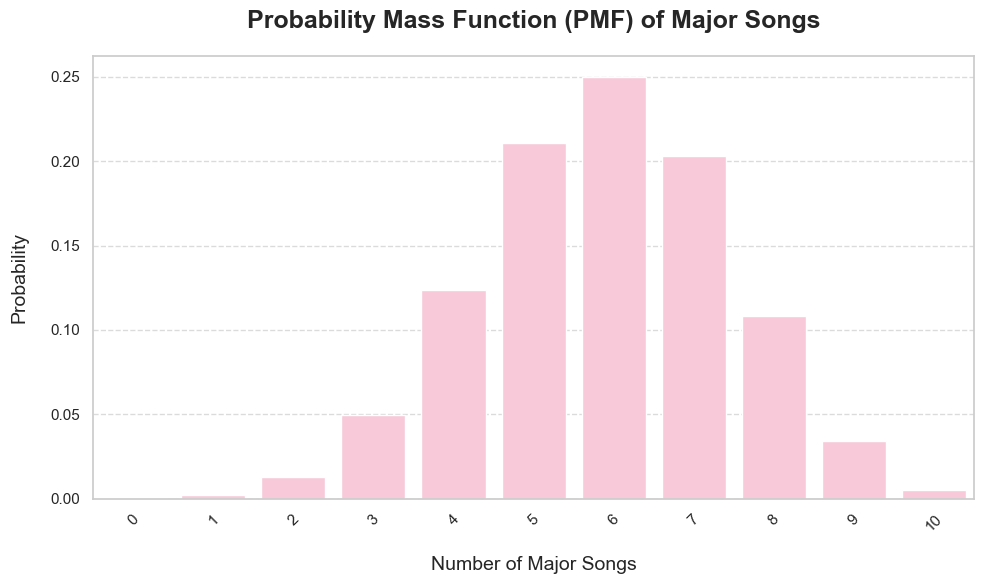

In [34]:
# PMF Chart  - bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Major Songs', y='Probability', data=pmf_df, color='#ffc1d7')
plt.title('Probability Mass Function (PMF) of Major Songs', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Major Songs', fontsize=14, labelpad=16)
plt.ylabel('Probability', fontsize=14, labelpad=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

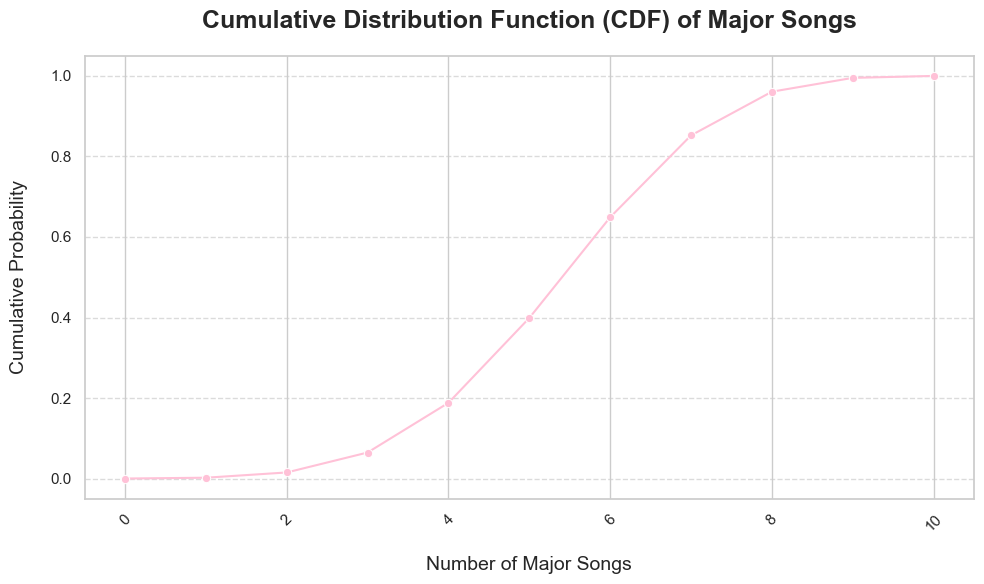

In [36]:
# CDF - cumulative distribution function
cdf_values = [binom.cdf(k, n, p) for k in k_values]
cdf_df = pd.DataFrame({'Number of Major Songs': k_values, 'Cumulative Probability': cdf_values})

# add to dataframe
pmf_df['Cumulative Probability'] = cdf_df['Cumulative Probability']

# CDF Chart - line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Major Songs', y='Cumulative Probability', data=pmf_df, marker='o', color='#ffc1d7')
plt.title('Cumulative Distribution Function (CDF) of Major Songs', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Major Songs', fontsize=14, labelpad=16)
plt.ylabel('Cumulative Probability', fontsize=14, labelpad=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Continuous distributions


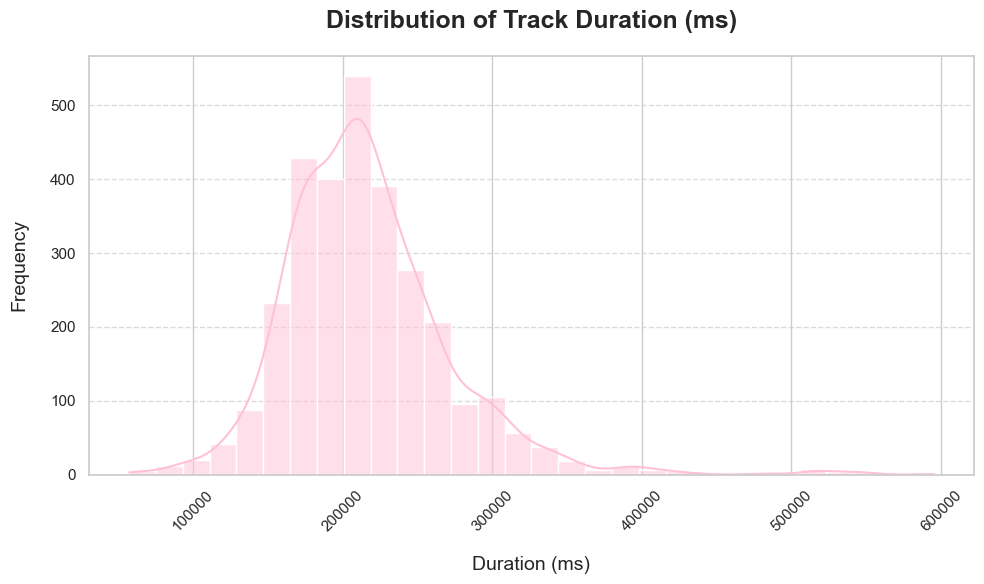

In [ ]:
# distribution of track duration (ms)
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], bins=30, kde=True, color='#ffc1d7')
plt.title('Distribution of Track Duration (ms)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Duration (ms)', fontsize=14, labelpad=16)
plt.ylabel('Frequency', fontsize=14, labelpad=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

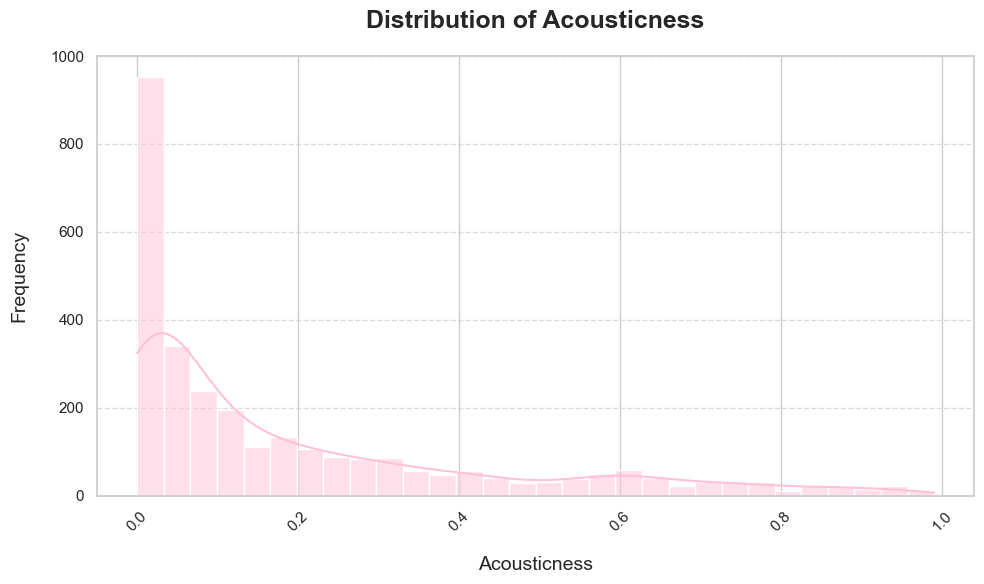

In [38]:
# distribution of acousticness
plt.figure(figsize=(10, 6))
sns.histplot(df['acousticness'], bins=30, kde=True, color='#ffc1d7')
plt.title('Distribution of Acousticness', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Acousticness', fontsize=14, labelpad=16)
plt.ylabel('Frequency', fontsize=14, labelpad=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the histograms above we can see that:

- `duration_ms` could follow a Normal distribution, but it is not clear.
- `acousticness` seems to follow the power law distributions.

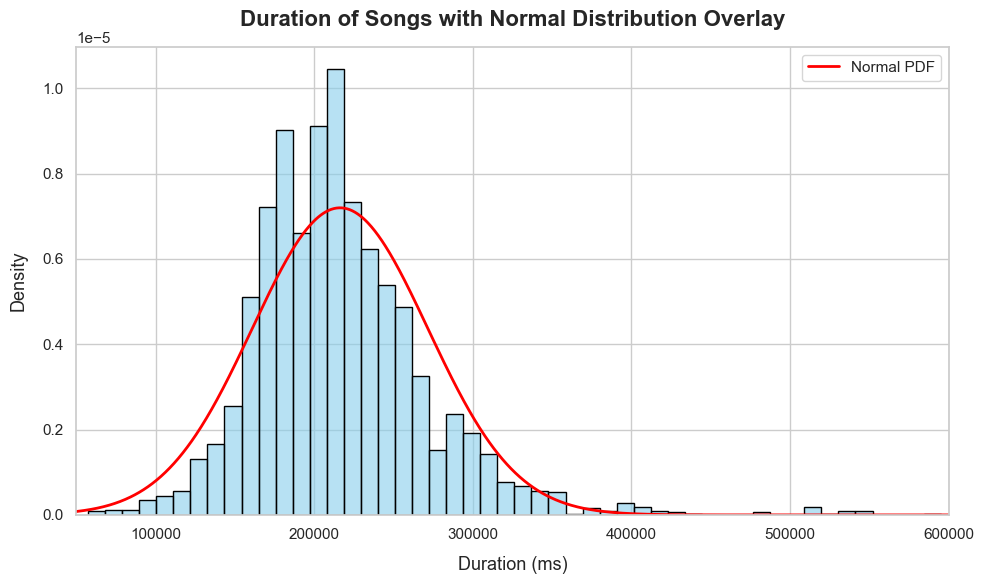

In [42]:
import numpy as np
from scipy.stats import norm


# Given mean and standard deviation
mu = df['duration_ms'].mean()
sigma = df['duration_ms'].std()

# Generate x values (duration range)
x = np.linspace(50000, 600000, 1000)

# Compute PDF values for those x
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot histogram of actual data
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], bins=50, stat='density', color='skyblue', edgecolor='black', alpha=0.6)

# Overlay the PDF
plt.plot(x, pdf, color='red', linewidth=2, label='Normal PDF')

# Customize chart
plt.title('Duration of Songs with Normal Distribution Overlay', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Duration (ms)', fontsize=13, labelpad=10)
plt.ylabel('Density', fontsize=13, labelpad=10)
plt.xlim(50000, 600000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

When comparing the two plots you can see that while they are in pretty good accordance, the histogram plot seems to be a bit skewed. This will make mean, median and mode different from each other, which violates a key condition in the normal distribution. Based on this evidence combined with your answer for Step 3, you can conclude that duration_ms does not follow exactly a Normal distribution. However, since the distributions are quite similar, you could use the normal distribution as an approximation of duration_ms depending on your use case and the level of precision needed.